In [446]:
import numpy as np
import pandas as pd

In [7]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: C:\Users\Arun\Documents\Scaler\Neural Network\MY learning\spiral.csv

  0%|          | 0.00/12.9k [00:00<?, ?B/s]
100%|##########| 12.9k/12.9k [00:00<00:00, 13.7MB/s]


In [448]:
df=pd.read_csv("spiral.csv")

In [450]:
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [452]:
df['y'].unique()

array([0, 1, 2], dtype=int64)

# It's clear we have a multi class problem statment to classify 

## In case of neural networks we need to pass the input features and output in array format

In [10]:
X=df.iloc[:,:-1].to_numpy()

In [12]:
y=df['y'].to_numpy()

# Defining Simiple Neural Network

# Neural network setup is input features are fed to a layer of 3 neuron and softmax activation function is applied to get the output

In [14]:
# layer Definition
m=len(X) # Based on number input records feed to neural network
d=X.shape[1] # Based on number of features
n=len(np.unique(y)) # Based on number of class

In [16]:
print(m,d,n)

300 2 3


# We need to initialize the weight and bias as a first step

In [19]:
w=0.01*np.random.randn(d,n)

In [21]:
w

array([[ 0.01418326,  0.00595354, -0.00119075],
       [ 0.02128621,  0.01518971,  0.00694054]])

In [23]:
b=np.zeros((1,n))

In [25]:
b

array([[0., 0., 0.]])

# Step 1

In [28]:
z=np.dot(X,w)+b

In [30]:
z.shape

(300, 3)

# Step 2
## Applying activation function to the Z and get the output

In [33]:
a=np.exp(z)

In [35]:
probs=a/np.sum(a,axis=1,keepdims=True)

In [37]:
probs.shape

(300, 3)

# Step 3
## Defining the loss function

In [40]:
def loss(y,probability):
    row=y.shape[0]
    error=-np.log(probability[range(row),y])
    return np.sum(error)/row

In [42]:
loss(y,probs)

1.0980354509524937

# Step 4
## Backpropagation

In [45]:
def backprop(probability,y,X):
    row=y.shape[0]
    dz=probability
    dz[range(row),y]-=1
    dz=dz/row
    dw=np.dot(X.T,dz)
    db=np.sum(dz,keepdims=True,axis=0)
    return dw,db
    

# Training the model

In [48]:
lr=1
max_iter=500
loss_history=[]
w=0.01*np.random.randn(d,n)
b=np.zeros((1,n))

for i in range(1,max_iter+1):
    z=np.dot(X,w)+b
    a=np.exp(z)
    probs=a/np.sum(a,axis=1,keepdims=True)
    loss_info=loss(y,probs)
    loss_history.append(loss_info)
    if i%50==0:
        print(f'Number of iteration is {i} and loss is {loss_info}')
    dw,db=backprop(probs,y,X)
    w+=-lr*dw
    b+=-lr*db


Number of iteration is 50 and loss is 0.7634826986565009
Number of iteration is 100 and loss is 0.7448439821858284
Number of iteration is 150 and loss is 0.741407655819512
Number of iteration is 200 and loss is 0.7405399098239498
Number of iteration is 250 and loss is 0.7402919589868511
Number of iteration is 300 and loss is 0.7402168910777657
Number of iteration is 350 and loss is 0.7401934802366087
Number of iteration is 400 and loss is 0.7401860617410307
Number of iteration is 450 and loss is 0.7401836900800968
Number of iteration is 500 and loss is 0.7401829281012046


In [50]:
history = pd.DataFrame({'step': list(range(max_iter)), 'loss': loss_history})

<Axes: xlabel='step', ylabel='loss'>

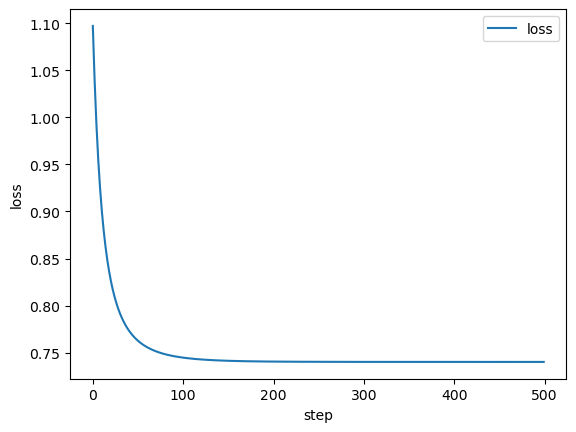

In [52]:
history.plot(x='step',y='loss',xlabel='step',ylabel='loss')

# Writing oops code for the softmax single layer classifier

In [219]:
class SoftmaxClassifier:

    def __init__(self,X,y):
        self.m=X.shape[0]
        self.n=len(np.unique(y))
        self.d=X.shape[1]
        self.loss_history=[]
        self.w=0.01*np.random.randn(self.d,self.n)
        self.b=np.zeros((1,self.n))

    def forward_pass(self,X):
        z=np.dot(X,self.w)+self.b
        a=np.exp(z)
        probs=a/np.sum(a,axis=1,keepdims=True)
        return probs

    def loss(self,probs):
        error=-np.log(probs[range(self.m),y])
        return np.sum(error)/self.m

    def back_prob(self,X,y,probs):
        dz=probs
        dz[range(self.m),y]-=1
        dz=dz/self.m
        dw=np.dot(X.T,dz)
        db=np.sum(dz,axis=0,keepdims=True)
        return dw,db

    def fit(self,X,y,lr=1,max_iter=500):
        for i in range(1,max_iter+1):
            probs=self.forward_pass(X)
            loss=self.loss(probs)
            self.loss_history.append(loss)
            if i%50==0:
                print(f'Number of iteration is {i} and loss is {loss}')
            dw,db=self.back_prob(X,y,probs)
            self.w+=-lr*dw
            self.b+=-lr*db
        self.loss_df=pd.DataFrame({'step':list(range(max_iter)),'loss':self.loss_history})
        #return self.w,self.b
    def parameters(self):
        return self.w,self.b
    
    def loss_plot(self):
        return self.loss_df.plot(x='step',y='loss',xlabel='step',ylabel='loss')

    def predict(self,X_input):
        probs=self.forward_pass(X_input)
        return np.argmax(probs,axis=1)

In [225]:
model=SoftmaxClassifier(X,y)

In [227]:
model.fit(X,y)

Number of iteration is 50 and loss is 0.7635221887942705
Number of iteration is 100 and loss is 0.7448504196458067
Number of iteration is 150 and loss is 0.7414092179288051
Number of iteration is 200 and loss is 0.7405403501449598
Number of iteration is 250 and loss is 0.7402920916844622
Number of iteration is 300 and loss is 0.740216932407626
Number of iteration is 350 and loss is 0.7401934933315886
Number of iteration is 400 and loss is 0.7401860659283205
Number of iteration is 450 and loss is 0.7401836914257587
Number of iteration is 500 and loss is 0.7401829285348532


<Axes: xlabel='step', ylabel='loss'>

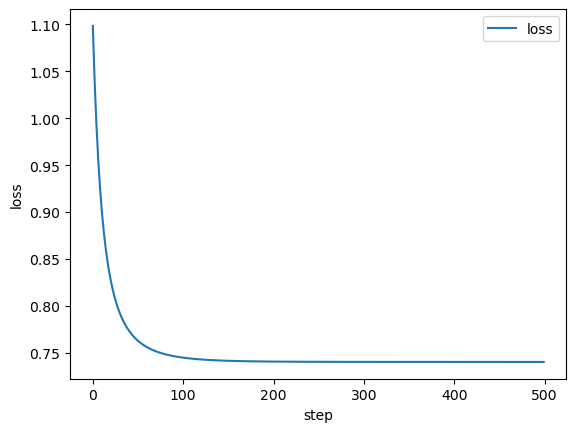

In [229]:
model.loss_plot()

# Training Accuracy

In [232]:
print("Training Accuracy is :",np.round((np.sum(model.predict(X) == y)/X.shape[0])*100,2))

Training Accuracy is : 52.67


In [235]:
model.parameters()

(array([[ 1.38975418,  0.99986894, -2.40721667],
        [-2.90970315,  3.32609437, -0.40217452]]),
 array([[-0.05205403, -0.02392471,  0.07597874]]))

# Neural network with single hidden layer

## Defining the network definition

In [454]:
X=df.iloc[:,:-1].to_numpy()

In [456]:
y=df['y'].to_numpy()

In [74]:
h=100 # no. of neurons in hidden layer

In [78]:
n=len(np.unique(y)) # no. of neurons in output layer

In [80]:
m=X.shape[0]

In [82]:
print(m,h,n)

300 100 3


In [84]:
w1=0.01*np.random.randn(d,h)

In [88]:
b1=np.zeros((1,h))

In [92]:
w2=0.01*np.random.randn(h,n)

In [96]:
b2=np.zeros((1,n))

# Forward propagation

In [129]:
z1=np.dot(X,w1)+b1

In [131]:
a1=np.maximum(0,z1)

In [135]:
z2=np.dot(a1,w2)+b2

In [147]:
z2_exp=np.exp(z2)

In [149]:
a2=z2_exp/np.sum(z2_exp,axis=1,keepdims=True)

# defining loss

In [156]:
probs=a2

In [162]:
loss=-np.log(probs[range(m),y])

In [166]:
final_loss=np.sum(loss)/y.shape[0]

In [168]:
final_loss

1.0986982894092465

# Backword propagation

In [187]:
dz2=probs

In [189]:
dz2[range(m),y]-=1

In [197]:
dz2=dz2/m

In [203]:
dw2=np.dot(a1.T,dz2)

In [207]:
db2=np.sum(dz2,axis=0,keepdims=True)

In [211]:
da1=np.dot(dz2,w2.T)

In [223]:
da1[z1<=0]=0

In [225]:
dz1=da1

In [229]:
dw1=np.dot(X.T,dz1)

In [231]:
db1=np.sum(dz1,axis=0,keepdims=True)

In [241]:
print("dz2 shape :",dz2.shape)
print("dw2 shape :",dw2.shape)
print("db2 shape :",db2.shape)
print("da1 shape :",da1.shape)
print("dz1 shape :",dz1.shape)
print("dw1 shape :",dw1.shape)
print("db1 shape :",db1.shape)

dz2 shape : (300, 3)
dw2 shape : (100, 3)
db2 shape : (1, 3)
da1 shape : (300, 100)
dz1 shape : (300, 100)
dw1 shape : (2, 100)
db1 shape : (1, 100)


In [243]:
lr=0.001

In [251]:
w1+=-lr*dw1
b1+=-lr*db1
w2+=-lr*dw2
b2+=-lr*db2

# Neural Network CLass

In [468]:
class NN:

    def __init__(self,X,y,n_hidden=100):
        self.m=X.shape[0]
        self.n=len(np.unique(y))
        self.h=n_hidden
        self.d=X.shape[1]
        self.w1=0.01*np.random.randn(self.d,self.h)
        self.b1=np.zeros((1,self.h))
        self.w2=0.01*np.random.randn(self.h,self.n)
        self.b2=np.zeros((1,self.n))
        self.loss_history=[]

    def forward_prop(self,X):
        z1=np.dot(X,self.w1)+self.b1
        a1=np.maximum(0,z1)
        z2=np.dot(a1,self.w2)+self.b2
        a2_exp=np.exp(z2)
        a2=a2_exp/np.sum(a2_exp,axis=1,keepdims=True)
        return a1,a2


    def loss(self,probs,y):
        loss_fn=-np.log(probs[range(self.m),y])
        row=y.shape[0]
        return np.sum(loss_fn)/row 

    def backward_prop(self,X,y,a1,a2):
        dz2=a2
        dz2[range(self.m),y] -= 1
        dz22=dz2/self.m
        dw2=np.dot(a1.T,dz2)
        db2=np.sum(dz2,axis=0,keepdims=True)
        da1=np.dot(dz2,self.w2.T)
        da1[a1<=0]=0
        dz1=da1
        dw1=np.dot(X.T,dz1)
        db1=np.sum(dz1,axis=0,keepdims=True)
        return dw1,dw2,db1,db2       
    

    def fit(self,X,y,lr=0.001,max_iter=10000):
        
        for i in range(1,max_iter+1):
            a1,a2=self.forward_prop(X)
            data_loss=self.loss(a2,y)
            self.loss_history.append(data_loss)
            if (i%500)==0:
                print(f"Loss for the Iteration {i} is {data_loss}")
            dw1,dw2,db1,db2=self.backward_prop(X,y,a1,a2)

            self.w1+=-lr*dw1
            self.w2+=-lr*dw2
            self.b1+=-lr*db1
            self.b2+=-lr*db2

        self.df_loss=pd.DataFrame({'step':list(range(max_iter)),'loss':self.loss_history})

        return "Model Fit Done"

    
    def loss_plot(self):
        return self.df_loss.plot(x='step',y='loss',xlabel='Iteration',ylabel='Loss')

    def predict(self,X):
        a1,a2=self.forward_prop(X)
        return np.argmax(a2,axis=1)

In [470]:
model_N=NN(X,y)

In [472]:
model_N.fit(X,y)

Loss for the Iteration 500 is 0.6521497401289319
Loss for the Iteration 1000 is 0.4009227659167565
Loss for the Iteration 1500 is 0.272372844393682
Loss for the Iteration 2000 is 0.21342432515356743
Loss for the Iteration 2500 is 0.16419634560380214
Loss for the Iteration 3000 is 0.12628477369813407
Loss for the Iteration 3500 is 0.0978516172583861
Loss for the Iteration 4000 is 0.0791596535061413
Loss for the Iteration 4500 is 0.067420790203315
Loss for the Iteration 5000 is 0.059469427691949
Loss for the Iteration 5500 is 0.053705786446792476
Loss for the Iteration 6000 is 0.04937527382736928
Loss for the Iteration 6500 is 0.04595340969402286
Loss for the Iteration 7000 is 0.04316568262998597
Loss for the Iteration 7500 is 0.0408357096663599
Loss for the Iteration 8000 is 0.038834196673501346
Loss for the Iteration 8500 is 0.03711208954984702
Loss for the Iteration 9000 is 0.03560124646151474
Loss for the Iteration 9500 is 0.03430819686698444
Loss for the Iteration 10000 is 0.0331646

'Model Fit Done'

<Axes: xlabel='Iteration', ylabel='Loss'>

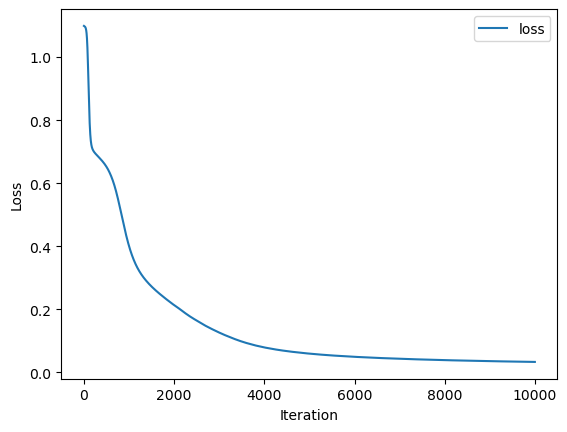

In [474]:
model_N.loss_plot()

In [476]:
print("Training Accuracy is :",np.round((np.sum(model_N.predict(X) == y)/X.shape[0])*100,2))

Training Accuracy is : 99.33
